In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from pandas import DataFrame , concat
from sklearn.metrics import mean_absolute_error , mean_squared_error
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from numpy import mean , concatenate
from math import sqrt
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Activation,Dropout
from numpy import array , hstack
from tensorflow import keras
import tensorflow as tf

In [2]:
df = pd.read_csv('floor6_temp_status.csv')
df

,Date,z1_S1(degC),Status
0,2018-07-01 00:00:00,27.57,0.0
1,2018-07-01 00:01:00,27.57,0.0
2,2018-07-01 00:02:00,27.57,0.0
3,2018-07-01 00:03:00,27.56,0.0
4,2018-07-01 00:04:00,27.56,0.0
...,...,...,...
101116,2018-09-13 03:42:00,26.86,0.0
101117,2018-09-13 03:43:00,26.86,0.0
101118,2018-09-13 03:44:00,26.86,0.0
101119,2018-09-13 03:45:00,26.86,0.0


In [3]:
df.index = pd.to_datetime(df['Date'], format='%Y.%m.%d %H:%M:%S')
df.drop(['Date'], inplace= True, axis=1)
df[:26]

,z1_S1(degC),Status
Date,,
2018-07-01 00:00:00,27.57,0.0
2018-07-01 00:01:00,27.57,0.0
2018-07-01 00:02:00,27.57,0.0
2018-07-01 00:03:00,27.56,0.0
2018-07-01 00:04:00,27.56,0.0
2018-07-01 00:05:00,27.56,0.0
2018-07-01 00:06:00,27.56,0.0
2018-07-01 00:07:00,27.56,0.0
2018-07-01 00:08:00,27.56,0.0


In [4]:
values = df.values

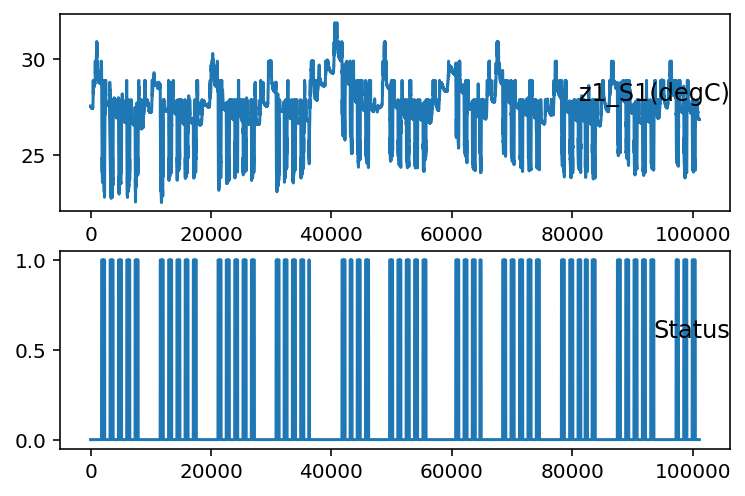

In [5]:
from matplotlib import pyplot
# specify columns to plot
groups = [0, 1]
i = 1
# plot each column
pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(df.columns[group], y=0.5, loc='right')
    i += 1
pyplot.show()

In [6]:
test_split=round(len(df)*0.30)

In [7]:
test_split

30336

In [8]:
new_df=pd.DataFrame({'z1_S1(degC)': [df['z1_S1(degC)'][i] for i in range(len(df)-1)],   #last value not included
                     'Status': [df['Status'][i] for i in range(1, len(df))]             #first value not included
                    })

In [9]:
df_for_training=new_df[:-30336]
df_for_testing=new_df[-30336:]

In [10]:
print(df_for_training.shape)
print(df_for_testing.shape)

(70784, 2)
(30336, 2)


In [11]:
scaler = MinMaxScaler(feature_range=(0,1))
df_for_training_scaled = scaler.fit_transform(df_for_training)

In [12]:
df_for_testing_scaled=scaler.transform(df_for_testing)

In [13]:
df_for_training_scaled

array([[0.5368984 , 0.        ],
       [0.5368984 , 0.        ],
       [0.5368984 , 0.        ],
       ...,
       [0.53368984, 0.        ],
       [0.53368984, 0.        ],
       [0.53368984, 0.        ]])

In [14]:
df_for_training_scaled.shape , df_for_testing_scaled.shape

((70784, 2), (30336, 2))

In [15]:
def createXY(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            dataY.append(dataset[i,0])
    return np.array(dataX),np.array(dataY)

In [16]:
trainX,trainY=createXY(df_for_training_scaled,15)

In [17]:
trainX.shape

(70769, 15, 2)

In [18]:
testX,testY=createXY(df_for_testing_scaled,15)

In [19]:
trainX[0]

array([[0.5368984 , 0.        ],
       [0.5368984 , 0.        ],
       [0.5368984 , 0.        ],
       [0.53582888, 0.        ],
       [0.53582888, 0.        ],
       [0.53582888, 0.        ],
       [0.53582888, 0.        ],
       [0.53582888, 0.        ],
       [0.53582888, 0.        ],
       [0.53582888, 0.        ],
       [0.53582888, 0.        ],
       [0.53582888, 0.        ],
       [0.53582888, 0.        ],
       [0.53582888, 0.        ],
       [0.53582888, 0.        ]])

In [20]:
print("trainX Shape-- ",trainX.shape)
print("trainY Shape-- ",trainY.shape)

trainX Shape--  (70769, 15, 2)
trainY Shape--  (70769,)


In [21]:
print("testX Shape-- ",testX.shape)
print("testY Shape-- ",testY.shape)

testX Shape--  (30321, 15, 2)
testY Shape--  (30321,)


In [22]:
print("trainX[0]-- \n",trainX[0])
print("\ntrainY[0]-- ",trainY[0])

trainX[0]-- 
 [[0.5368984  0.        ]
 [0.5368984  0.        ]
 [0.5368984  0.        ]
 [0.53582888 0.        ]
 [0.53582888 0.        ]
 [0.53582888 0.        ]
 [0.53582888 0.        ]
 [0.53582888 0.        ]
 [0.53582888 0.        ]
 [0.53582888 0.        ]
 [0.53582888 0.        ]
 [0.53582888 0.        ]
 [0.53582888 0.        ]
 [0.53582888 0.        ]
 [0.53582888 0.        ]]

trainY[0]--  0.5358288770053474


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(InputLayer((15, 2)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                17152     
_________________________________________________________________
dense (Dense)                (None, 8)                 520       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 17,681
Trainable params: 17,681
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [25]:
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=50)

Epoch 1/50
2212/2212 [==============================] - 18s 7ms/step - loss: 0.0076 - root_mean_squared_error: 0.0870 - val_loss: 2.6970e-04 - val_root_mean_squared_error: 0.0164
Epoch 2/50
2212/2212 [==============================] - 14s 6ms/step - loss: 2.9937e-04 - root_mean_squared_error: 0.0173 - val_loss: 2.5069e-04 - val_root_mean_squared_error: 0.0158
Epoch 3/50
2212/2212 [==============================] - 13s 6ms/step - loss: 2.1997e-04 - root_mean_squared_error: 0.0148 - val_loss: 1.6557e-04 - val_root_mean_squared_error: 0.0129
Epoch 4/50
2212/2212 [==============================] - 13s 6ms/step - loss: 1.5175e-04 - root_mean_squared_error: 0.0123 - val_loss: 1.3986e-04 - val_root_mean_squared_error: 0.0118
Epoch 5/50
2212/2212 [==============================] - 15s 7ms/step - loss: 1.3518e-04 - root_mean_squared_error: 0.0116 - val_loss: 1.2021e-04 - val_root_mean_squared_error: 0.0110
Epoch 6/50
2212/2212 [==============================] - 15s 7ms/step - loss: 1.2808e-04 -

2212/2212 [==============================] - 14s 6ms/step - loss: 8.1985e-05 - root_mean_squared_error: 0.0091 - val_loss: 8.0447e-05 - val_root_mean_squared_error: 0.0090
Epoch 46/50
2212/2212 [==============================] - 15s 7ms/step - loss: 8.1354e-05 - root_mean_squared_error: 0.0090 - val_loss: 8.1671e-05 - val_root_mean_squared_error: 0.0090
Epoch 47/50
2212/2212 [==============================] - 15s 7ms/step - loss: 8.1168e-05 - root_mean_squared_error: 0.0090 - val_loss: 7.7142e-05 - val_root_mean_squared_error: 0.0088
Epoch 48/50
2212/2212 [==============================] - 14s 6ms/step - loss: 8.0851e-05 - root_mean_squared_error: 0.0090 - val_loss: 7.6246e-05 - val_root_mean_squared_error: 0.0087
Epoch 49/50
2212/2212 [==============================] - 13s 6ms/step - loss: 8.1151e-05 - root_mean_squared_error: 0.0090 - val_loss: 7.8728e-05 - val_root_mean_squared_error: 0.0089
Epoch 50/50
2212/2212 [==============================] - 14s 6ms/step - loss: 8.1043e-05 - r

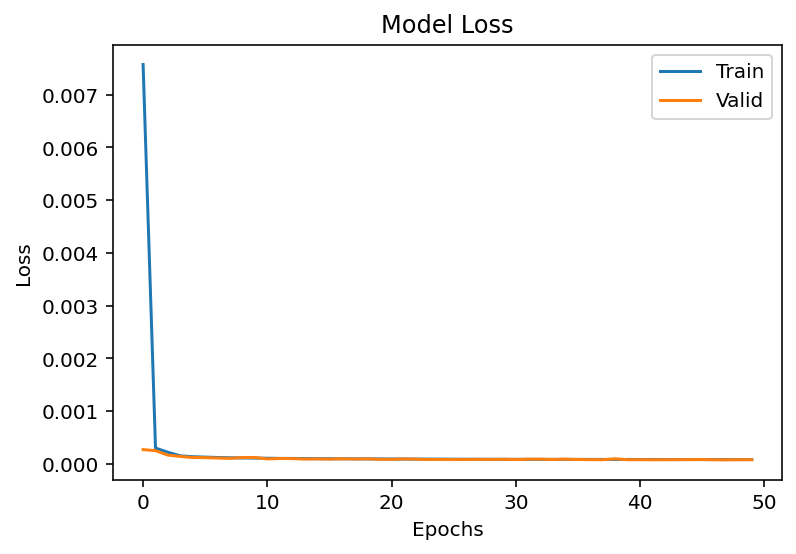

In [26]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Valid'])
plt.show()

In [27]:
prediction=model.predict(testX)

In [28]:
print("prediction\n", prediction)
print("\nPrediction Shape-",prediction.shape)

prediction
 [[0.5326344 ]
 [0.5326415 ]
 [0.5326494 ]
 ...
 [0.46287993]
 [0.46287993]
 [0.46287993]]

Prediction Shape- (30321, 1)


In [29]:
scaler.inverse_transform(prediction)

ValueError: non-broadcastable output operand with shape (30321,1) doesn't match the broadcast shape (30321,2)

In [30]:
prediction_copies_array = np.repeat(prediction,2, axis=-1)

In [31]:
prediction_copies_array.shape

(30321, 2)

In [32]:
prediction_copies_array

array([[0.5326344 , 0.5326344 ],
       [0.5326415 , 0.5326415 ],
       [0.5326494 , 0.5326494 ],
       ...,
       [0.46287993, 0.46287993],
       [0.46287993, 0.46287993],
       [0.46287993, 0.46287993]], dtype=float32)

In [33]:
pred=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(prediction),2)))[:,0]

In [34]:
pred

array([27.530132, 27.5302  , 27.530272, ..., 26.877926, 26.877926,
       26.877926], dtype=float32)

In [35]:
original_copies_array = np.repeat(testY,2, axis=-1)

original_copies_array.shape

original=scaler.inverse_transform(np.reshape(original_copies_array,(len(testY),2)))[:,0]

In [36]:
print("Pred Values-- " ,pred)
print("\nOriginal Values-- ",original)

Pred Values--  [27.530132 27.5302   27.530272 ... 26.877926 26.877926 26.877926]

Original Values--  [27.52 27.52 27.52 ... 26.86 26.86 26.86]


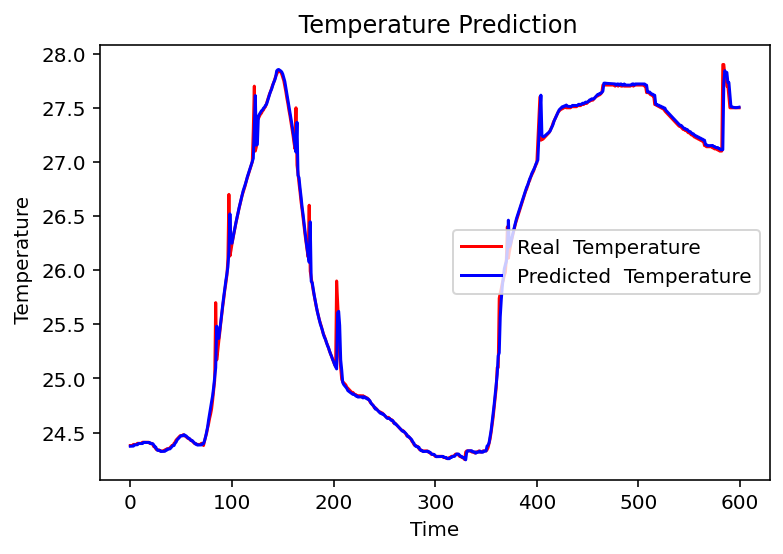

In [37]:
plt.plot(original[3400:4000], color = 'red', label = 'Real  Temperature')
plt.plot(pred[3400:4000], color = 'blue', label = 'Predicted  Temperature')
plt.title(' Temperature Prediction')
plt.xlabel('Time')
plt.ylabel(' Temperature')
plt.legend()
plt.show()

In [71]:
pred_df = pd.DataFrame(pred, 
             columns=['Predicted z1_S1(degC)', 
                      ])
pred_df

,Predicted z1_S1(degC)
0,27.530132
1,27.530199
2,27.530272
3,27.530348
4,27.530418
...,...
30316,26.877926
30317,26.877926
30318,26.877926
30319,26.877926


In [76]:
df_status=pd.read_csv("df_test_status_only.csv")

In [77]:
df_status.reset_index(drop=True)
df_status

,Status
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
30316,0.0
30317,0.0
30318,0.0
30319,0.0


In [78]:
combined_pred_df = pd.concat([pred_df, df_status], axis=1)
combined_pred_df

,Predicted z1_S1(degC),Status
0,27.530132,0.0
1,27.530199,0.0
2,27.530272,0.0
3,27.530348,0.0
4,27.530418,0.0
...,...,...
30316,26.877926,0.0
30317,26.877926,0.0
30318,26.877926,0.0
30319,26.877926,0.0


In [80]:
original_df = pd.DataFrame(original, 
             columns=['Original z1_S1(degC)', 
                      ])
original_df

,Original z1_S1(degC)
0,27.52
1,27.52
2,27.52
3,27.52
4,27.52
...,...
30316,26.86
30317,26.86
30318,26.86
30319,26.86


In [81]:
combined_original_df = pd.concat([original_df, df_status], axis=1)
combined_original_df

,Original z1_S1(degC),Status
0,27.52,0.0
1,27.52,0.0
2,27.52,0.0
3,27.52,0.0
4,27.52,0.0
...,...,...
30316,26.86,0.0
30317,26.86,0.0
30318,26.86,0.0
30319,26.86,0.0


# Ignore below

In [54]:
df_15_minutes_past=df.iloc[-15:,:]

In [55]:
df_15_minutes_past

,z1_S1(degC),Status
Date,,
2018-09-13 03:32:00,26.86,0.0
2018-09-13 03:33:00,26.86,0.0
2018-09-13 03:34:00,26.86,0.0
2018-09-13 03:35:00,26.86,0.0
2018-09-13 03:36:00,26.86,0.0
2018-09-13 03:37:00,26.86,0.0
2018-09-13 03:38:00,26.86,0.0
2018-09-13 03:39:00,26.86,0.0
2018-09-13 03:40:00,26.86,0.0


In [111]:
df_15_minutes_future=pd.read_csv("test_data3.csv",parse_dates=["Date"],index_col=[0])
df_15_minutes_future.shape

(15, 2)

In [112]:
df_15_minutes_future

,z1_S1(degC),Status
Date,,
2018-09-13 03:46:00,0,0
2018-09-13 03:47:00,0,0
2018-09-13 03:48:00,0,0
2018-09-13 03:49:00,0,0
2018-09-13 03:50:00,0,0
2018-09-13 03:51:00,0,0
2018-09-13 03:52:00,0,0
2018-09-13 03:53:00,0,0
2018-09-13 03:54:00,0,0


In [113]:
df_15_minutes_future["z1_S1(degC)"]=0
df_15_minutes_future=df_15_minutes_future[["z1_S1(degC)","Status"]]
old_scaled_array=scaler.transform(df_15_minutes_past)
new_scaled_array=scaler.transform(df_15_minutes_future)
new_scaled_df=pd.DataFrame(new_scaled_array)
new_scaled_df.iloc[:,0]=np.nan
full_df=pd.concat([pd.DataFrame(old_scaled_array),new_scaled_df]).reset_index().drop(["index"],axis=1)

In [114]:
full_df.shape

(30, 2)

In [115]:
full_df.tail()

,0,1
25,NaN,0.0
26,NaN,0.0
27,NaN,0.0
28,NaN,0.0
29,NaN,0.0


In [116]:
full_df_scaled_array=full_df.values

In [117]:
full_df_scaled_array.shape

(30, 2)

In [118]:
all_data=[]
time_step=15
for i in range(time_step,len(full_df_scaled_array)):
    data_x=[]
    data_x.append(full_df_scaled_array[i-time_step:i,0:full_df_scaled_array.shape[1]])
    data_x=np.array(data_x)
    prediction=model.predict(data_x)
    all_data.append(prediction)
    full_df.iloc[i,0]=prediction

In [119]:
all_data

[array([[0.46283498]], dtype=float32),
 array([[0.46469516]], dtype=float32),
 array([[0.46664706]], dtype=float32),
 array([[0.46867165]], dtype=float32),
 array([[0.47076267]], dtype=float32),
 array([[0.47291756]], dtype=float32),
 array([[0.4751327]], dtype=float32),
 array([[0.4774015]], dtype=float32),
 array([[0.4797146]], dtype=float32),
 array([[0.4820612]], dtype=float32),
 array([[0.48442978]], dtype=float32),
 array([[0.48680902]], dtype=float32),
 array([[0.48918894]], dtype=float32),
 array([[0.4915609]], dtype=float32),
 array([[0.49391782]], dtype=float32)]

In [120]:
new_array=np.array(all_data)
new_array=new_array.reshape(-1,1)
prediction_copies_array = np.repeat(new_array,2, axis=-1)
y_pred_future_15_minutes = scaler.inverse_transform(np.reshape(prediction_copies_array,(len(new_array),2)))[:,0]

In [121]:
y_pred_future_15_minutes

array([26.877506, 26.8949  , 26.91315 , 26.932081, 26.951632, 26.971779,
       26.99249 , 27.013702, 27.035332, 27.057274, 27.079418, 27.101664,
       27.123915, 27.146093, 27.168133], dtype=float32)

In [122]:
mean_squared_error(original, pred)
print("MSE : ",mean_squared_error(original, pred))

MSE :  0.007630893267088081


In [123]:
df_future = pd.DataFrame(y_pred_future_15_minutes)

In [124]:
df_future.columns=['z1_S1(degC)']

In [125]:
df_future

,z1_S1(degC)
0,26.877506
1,26.894899
2,26.913151
3,26.932081
4,26.951632
5,26.971779
6,26.992491
7,27.013702
8,27.035332
9,27.057274


In [126]:
result = pd.merge(df_15_minutes_future, df_future, how='right', on = 'z1_S1(degC)')

C:\Users\azhan\anaconda3\envs\FYP\lib\site-packages\pandas\core\reshape\merge.py:1127: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  UserWarning,


In [127]:
result

,z1_S1(degC),Status
0,26.877506,NaN
1,26.894899,NaN
2,26.913151,NaN
3,26.932081,NaN
4,26.951632,NaN
5,26.971779,NaN
6,26.992491,NaN
7,27.013702,NaN
8,27.035332,NaN
9,27.057274,NaN


In [128]:
result2 = result.fillna(0)
result2

,z1_S1(degC),Status
0,26.877506,0.0
1,26.894899,0.0
2,26.913151,0.0
3,26.932081,0.0
4,26.951632,0.0
5,26.971779,0.0
6,26.992491,0.0
7,27.013702,0.0
8,27.035332,0.0
9,27.057274,0.0


In [129]:
print("MSE : ",mean_squared_error(df_15_minutes_past, result2))

MSE :  0.01647547518487854


In [99]:
from keras.models import load_model

model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

In [110]:
score = model.evaluate(testX, testY, verbose=1) 
print("%s: %.2f%% " %  (model.metrics_names[1], score[1]*100))

948/948 [==============================] - 3s 3ms/step - loss: 8.7288e-05 - root_mean_squared_error: 0.0093
root_mean_squared_error: 0.93% 


# 15 OFF 15 ON

In [130]:
df_15_minutes_past_off=df.iloc[71231:71246]
df_15_minutes_past_off

,z1_S1(degC),Status
Date,,
2018-08-22 07:25:00,27.77,0.0
2018-08-22 07:26:00,27.77,0.0
2018-08-22 07:27:00,27.78,0.0
2018-08-22 07:28:00,27.78,0.0
2018-08-22 07:29:00,27.78,0.0
2018-08-22 07:30:00,27.79,0.0
2018-08-22 07:31:00,27.79,0.0
2018-08-22 07:32:00,27.80,0.0
2018-08-22 07:33:00,27.80,0.0


In [131]:
df_15_minutes_future_on=pd.read_csv("test_data_4_future.csv",parse_dates=["Date"],index_col=[0])
df_15_minutes_future_on.shape

(15, 2)

In [132]:
df_15_minutes_future_on

,z1_S1(degC),Status
Date,,
2018-08-22 07:40:00,0.0,1.0
2018-08-22 07:41:00,0.0,1.0
2018-08-22 07:42:00,0.0,1.0
2018-08-22 07:43:00,0.0,1.0
2018-08-22 07:44:00,0.0,1.0
2018-08-22 07:45:00,0.0,1.0
2018-08-22 07:46:00,0.0,1.0
2018-08-22 07:47:00,0.0,1.0
2018-08-22 07:48:00,0.0,1.0


In [133]:
df_15_minutes_future_on["z1_S1(degC)"]=0
df_15_minutes_future_on=df_15_minutes_future_on[["z1_S1(degC)","Status"]]
old_scaled_array1=scaler.transform(df_15_minutes_past_off)
new_scaled_array1=scaler.transform(df_15_minutes_future_on)
new_scaled_df1=pd.DataFrame(new_scaled_array1)
new_scaled_df1.iloc[:,0]=np.nan
full_df1=pd.concat([pd.DataFrame(old_scaled_array1),new_scaled_df1]).reset_index().drop(["index"],axis=1)

In [134]:
full_df1.shape

(30, 2)

In [135]:
full_df_scaled_array1=full_df1.values
full_df_scaled_array1.shape

(30, 2)

In [136]:
all_data1=[]
time_step=15
for i in range(time_step,len(full_df_scaled_array1)):
    data_x1=[]
    data_x1.append(full_df_scaled_array1[i-time_step:i,0:full_df_scaled_array1.shape[1]])
    data_x1=np.array(data_x1)
    prediction1=model.predict(data_x1)
    all_data1.append(prediction1)
    full_df1.iloc[i,0]=prediction1

In [137]:
all_data1

[array([[0.5668848]], dtype=float32),
 array([[0.5720048]], dtype=float32),
 array([[0.5763858]], dtype=float32),
 array([[0.5818999]], dtype=float32),
 array([[0.58810353]], dtype=float32),
 array([[0.5925228]], dtype=float32),
 array([[0.5950393]], dtype=float32),
 array([[0.59624803]], dtype=float32),
 array([[0.59643]], dtype=float32),
 array([[0.5957689]], dtype=float32),
 array([[0.59444]], dtype=float32),
 array([[0.592601]], dtype=float32),
 array([[0.5903946]], dtype=float32),
 array([[0.58794016]], dtype=float32),
 array([[0.58534896]], dtype=float32)]

In [138]:
new_array1=np.array(all_data1)
new_array1=new_array1.reshape(-1,1)
prediction_copies_array1 = np.repeat(new_array1,2, axis=-1)
y_pred_future_15_minutes_on = scaler.inverse_transform(np.reshape(prediction_copies_array1,(len(new_array1),2)))[:,0]

In [139]:
y_pred_future_15_minutes_on

array([27.850374, 27.898245, 27.939209, 27.990763, 28.048767, 28.090088,
       28.113617, 28.12492 , 28.126621, 28.12044 , 28.108013, 28.090818,
       28.07019 , 28.04724 , 28.023014], dtype=float32)

In [141]:
df_future_on = pd.DataFrame(y_pred_future_15_minutes_on)
df_future_on.columns=['z1_S1(degC)']
df_future_on

,z1_S1(degC)
0,27.850374
1,27.898245
2,27.939209
3,27.990763
4,28.048767
5,28.090088
6,28.113617
7,28.124920
8,28.126621
9,28.120440


In [142]:
result_15_on = pd.merge(df_15_minutes_future_on, df_future_on, how='right', on = 'z1_S1(degC)')

C:\Users\azhan\anaconda3\envs\FYP\lib\site-packages\pandas\core\reshape\merge.py:1127: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  UserWarning,


In [144]:
result_15_on = result_15_on.fillna(1)
result_15_on

,z1_S1(degC),Status
0,27.850374,1.0
1,27.898245,1.0
2,27.939209,1.0
3,27.990763,1.0
4,28.048767,1.0
5,28.090088,1.0
6,28.113617,1.0
7,28.124920,1.0
8,28.126621,1.0
9,28.120440,1.0


In [146]:
df_15_on_true = pd.read_csv('df_test_4.csv',parse_dates=["Date"],index_col=[0])
df_15_on_true

,z1_S1(degC),Status
Date,,
2018-08-22 07:40:00,27.84,1.0
2018-08-22 07:41:00,27.83,1.0
2018-08-22 07:42:00,27.82,1.0
2018-08-22 07:43:00,27.79,1.0
2018-08-22 07:44:00,27.77,1.0
2018-08-22 07:45:00,27.73,1.0
2018-08-22 07:46:00,27.69,1.0
2018-08-22 07:47:00,27.63,1.0
2018-08-22 07:48:00,27.57,1.0


In [217]:
print("MSE : ",mean_squared_error(df_15_on_true, result_15_on))
print("RMSE : ",mean_squared_error(df_15_on_true, result_15_on, squared=False))
print("MAE : ",mean_absolute_error(df_15_on_true, result_15_on))

MSE :  0.1292171401187508
RMSE :  0.25418215920747744
MAE :  0.2130772908528646


# 15 ON 15 ON

In [201]:
df_15_minutes_past_on=df.iloc[71247:71262]
df_15_minutes_past_on

,z1_S1(degC),Status
Date,,
2018-08-22 07:41:00,27.83,1.0
2018-08-22 07:42:00,27.82,1.0
2018-08-22 07:43:00,27.79,1.0
2018-08-22 07:44:00,27.77,1.0
2018-08-22 07:45:00,27.73,1.0
2018-08-22 07:46:00,27.69,1.0
2018-08-22 07:47:00,27.63,1.0
2018-08-22 07:48:00,27.57,1.0
2018-08-22 07:49:00,27.49,1.0


In [202]:
df_15_minutes_future_on_2=pd.read_csv("test_data_1.csv",parse_dates=["Date"],index_col=[0])
df_15_minutes_future_on_2.shape
df_15_minutes_future_on_2

,z1_S1(degC),Status
Date,,
2018-08-22 07:56:00,0.0,1.0
2018-08-22 07:57:00,0.0,1.0
2018-08-22 07:58:00,0.0,1.0
2018-08-22 07:59:00,0.0,1.0
2018-08-22 08:00:00,0.0,1.0
2018-08-22 08:01:00,0.0,1.0
2018-08-22 08:02:00,0.0,1.0
2018-08-22 08:03:00,0.0,1.0
2018-08-22 08:04:00,0.0,1.0


In [203]:
df_15_minutes_future_on_2["z1_S1(degC)"]=0
df_15_minutes_future_on_2=df_15_minutes_future_on_2[["z1_S1(degC)","Status"]]
old_scaled_array2=scaler.transform(df_15_minutes_past_on)
new_scaled_array2=scaler.transform(df_15_minutes_future_on_2)
new_scaled_df2=pd.DataFrame(new_scaled_array2)
new_scaled_df2.iloc[:,0]=np.nan
full_df2=pd.concat([pd.DataFrame(old_scaled_array2),new_scaled_df2]).reset_index().drop(["index"],axis=1)

In [204]:
full_df2.shape

(30, 2)

In [205]:
full_df_scaled_array2=full_df2.values
full_df_scaled_array2.shape

(30, 2)

In [206]:
all_data2=[]
time_step=15
for i in range(time_step,len(full_df_scaled_array2)):
    data_x2=[]
    data_x2.append(full_df_scaled_array2[i-time_step:i,0:full_df_scaled_array2.shape[1]])
    data_x2=np.array(data_x2)
    prediction2=model.predict(data_x2)
    all_data2.append(prediction2)
    full_df2.iloc[i,0]=prediction2

In [207]:
all_data2

[array([[0.46848404]], dtype=float32),
 array([[0.47181767]], dtype=float32),
 array([[0.47550553]], dtype=float32),
 array([[0.4785595]], dtype=float32),
 array([[0.47804838]], dtype=float32),
 array([[0.4766958]], dtype=float32),
 array([[0.4755243]], dtype=float32),
 array([[0.47470856]], dtype=float32),
 array([[0.47419828]], dtype=float32),
 array([[0.4739051]], dtype=float32),
 array([[0.4737629]], dtype=float32),
 array([[0.4737202]], dtype=float32),
 array([[0.47374266]], dtype=float32),
 array([[0.4738043]], dtype=float32),
 array([[0.47417825]], dtype=float32)]

In [208]:
new_array2=np.array(all_data2)
new_array2=new_array2.reshape(-1,1)
prediction_copies_array2 = np.repeat(new_array2,2, axis=-1)
y_pred_future_15_minutes_on_2 = scaler.inverse_transform(np.reshape(prediction_copies_array2,(len(new_array2),2)))[:,0]

In [209]:
y_pred_future_15_minutes_on_2

array([26.930326, 26.961494, 26.995977, 27.02453 , 27.019753, 27.007105,
       26.996153, 26.988523, 26.983753, 26.981012, 26.979683, 26.979284,
       26.979494, 26.98007 , 26.983566], dtype=float32)

In [210]:
df_future_on_2 = pd.DataFrame(y_pred_future_15_minutes_on_2)
df_future_on_2.columns=['z1_S1(degC)']
df_future_on_2

,z1_S1(degC)
0,26.930326
1,26.961494
2,26.995977
3,27.024530
4,27.019753
5,27.007105
6,26.996153
7,26.988523
8,26.983753
9,26.981012


In [211]:
result_15_on_2 = pd.merge(df_15_minutes_future_on_2, df_future_on_2, how='right', on = 'z1_S1(degC)')

C:\Users\azhan\anaconda3\envs\FYP\lib\site-packages\pandas\core\reshape\merge.py:1127: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  UserWarning,


In [212]:
result_15_on_2 = result_15_on_2.fillna(1)
result_15_on_2

,z1_S1(degC),Status
0,26.930326,1.0
1,26.961494,1.0
2,26.995977,1.0
3,27.024530,1.0
4,27.019753,1.0
5,27.007105,1.0
6,26.996153,1.0
7,26.988523,1.0
8,26.983753,1.0
9,26.981012,1.0


In [213]:
df_15_on_true_2 = pd.read_csv('df_test_1_future_true.csv',parse_dates=["Date"],index_col=[0])
df_15_on_true_2

,z1_S1(degC),Status
Date,,
2018-08-22 07:56:00,26.91,1.0
2018-08-22 07:57:00,26.83,1.0
2018-08-22 07:58:00,26.74,1.0
2018-08-22 07:59:00,26.66,1.0
2018-08-22 08:00:00,26.58,1.0
2018-08-22 08:01:00,26.50,1.0
2018-08-22 08:02:00,26.43,1.0
2018-08-22 08:03:00,26.35,1.0
2018-08-22 08:04:00,26.28,1.0


In [218]:
print("MSE : ",mean_squared_error(df_15_on_true_2, result_15_on_2))
print("RMSE : ",mean_squared_error(df_15_on_true_2, result_15_on_2, squared=False))
print("MAE : ",mean_absolute_error(df_15_on_true_2, result_15_on_2))

MSE :  0.20091349765434366
RMSE :  0.3169491265600393
MAE :  0.27635752360026056


# 15 ON 15 OFF

In [164]:
df_test_2_past = df.iloc[71473:71488]
df_test_2_past

,z1_S1(degC),Status
Date,,
2018-08-22 11:27:00,24.35,1.0
2018-08-22 11:28:00,24.35,1.0
2018-08-22 11:29:00,24.35,1.0
2018-08-22 11:30:00,24.35,1.0
2018-08-22 11:31:00,24.35,1.0
2018-08-22 11:32:00,24.36,1.0
2018-08-22 11:33:00,24.36,1.0
2018-08-22 11:34:00,24.37,1.0
2018-08-22 11:35:00,24.37,1.0


In [166]:
df_15_minutes_future_off=pd.read_csv("test_data_2.csv",parse_dates=["Date"],index_col=[0])
df_15_minutes_future_off.shape
df_15_minutes_future_off

,z1_S1(degC),Status
Date,,
2018-08-22 11:42:00,0.0,0.0
2018-08-22 11:43:00,0.0,0.0
2018-08-22 11:44:00,0.0,0.0
2018-08-22 11:45:00,0.0,0.0
2018-08-22 11:46:00,0.0,0.0
2018-08-22 11:47:00,0.0,0.0
2018-08-22 11:48:00,0.0,0.0
2018-08-22 11:49:00,0.0,0.0
2018-08-22 11:50:00,0.0,0.0


In [167]:
df_15_minutes_future_off["z1_S1(degC)"]=0
df_15_minutes_future_off=df_15_minutes_future_off[["z1_S1(degC)","Status"]]
old_scaled_array3=scaler.transform(df_test_2_past)
new_scaled_array3=scaler.transform(df_15_minutes_future_off)
new_scaled_df3=pd.DataFrame(new_scaled_array3)
new_scaled_df3.iloc[:,0]=np.nan
full_df3=pd.concat([pd.DataFrame(old_scaled_array3),new_scaled_df3]).reset_index().drop(["index"],axis=1)

In [168]:
full_df3.shape

(30, 2)

In [169]:
full_df_scaled_array3=full_df3.values
full_df_scaled_array3.shape

(30, 2)

In [171]:
all_data3=[]
time_step=15
for i in range(time_step,len(full_df_scaled_array3)):
    data_x3=[]
    data_x3.append(full_df_scaled_array3[i-time_step:i,0:full_df_scaled_array3.shape[1]])
    data_x3=np.array(data_x3)
    prediction3=model.predict(data_x3)
    all_data3.append(prediction3)
    full_df3.iloc[i,0]=prediction3

In [172]:
all_data3

[array([[0.20269243]], dtype=float32),
 array([[0.21259823]], dtype=float32),
 array([[0.22170968]], dtype=float32),
 array([[0.22904344]], dtype=float32),
 array([[0.23566557]], dtype=float32),
 array([[0.24310413]], dtype=float32),
 array([[0.25176483]], dtype=float32),
 array([[0.26166624]], dtype=float32),
 array([[0.27265415]], dtype=float32),
 array([[0.2844004]], dtype=float32),
 array([[0.29659694]], dtype=float32),
 array([[0.30895033]], dtype=float32),
 array([[0.32114118]], dtype=float32),
 array([[0.3329587]], dtype=float32),
 array([[0.34421414]], dtype=float32)]

In [173]:
new_array3=np.array(all_data3)
new_array3=new_array3.reshape(-1,1)
prediction_copies_array3 = np.repeat(new_array3,2, axis=-1)
y_pred_future_15_minutes_off= scaler.inverse_transform(np.reshape(prediction_copies_array3,(len(new_array3),2)))[:,0]

In [174]:
y_pred_future_15_minutes_off

array([24.445173, 24.537794, 24.622986, 24.691555, 24.753471, 24.823023,
       24.904001, 24.996578, 25.099318, 25.209143, 25.323181, 25.438686,
       25.55267 , 25.663162, 25.768402], dtype=float32)

In [175]:
df_future_off = pd.DataFrame(y_pred_future_15_minutes_off)
df_future_off.columns=['z1_S1(degC)']
df_future_off

,z1_S1(degC)
0,24.445173
1,24.537794
2,24.622986
3,24.691555
4,24.753471
5,24.823023
6,24.904001
7,24.996578
8,25.099318
9,25.209143


In [178]:
result_15_off = pd.merge(df_15_minutes_future_off, df_future_off, how='right', on = 'z1_S1(degC)')

In [179]:
result_15_off = result_15_off.fillna(0)
result_15_off

,z1_S1(degC),Status
0,24.445173,0.0
1,24.537794,0.0
2,24.622986,0.0
3,24.691555,0.0
4,24.753471,0.0
5,24.823023,0.0
6,24.904001,0.0
7,24.996578,0.0
8,25.099318,0.0
9,25.209143,0.0


In [180]:
df_15_off_true = pd.read_csv('df_test_2_future_true.csv',parse_dates=["Date"],index_col=[0])
df_15_off_true

,z1_S1(degC),Status
Date,,
2018-08-22 11:42:00,24.40,0.0
2018-08-22 11:43:00,24.43,0.0
2018-08-22 11:44:00,24.46,0.0
2018-08-22 11:45:00,24.50,0.0
2018-08-22 11:46:00,24.56,0.0
2018-08-22 11:47:00,24.62,0.0
2018-08-22 11:48:00,24.70,0.0
2018-08-22 11:49:00,24.79,0.0
2018-08-22 11:50:00,24.89,0.0


In [219]:
print("MSE : ",mean_squared_error(df_15_off_true, result_15_off))
print("RMSE : ",mean_squared_error(df_15_off_true, result_15_off, squared=False))
print("MSE : ",mean_absolute_error(df_15_off_true, result_15_off))

MSE :  0.029379174694871772
RMSE :  0.12120060786743557
MSE :  0.11175937398274745


# 15 OFF 15 OFF

In [182]:
df_test_3_past = df.iloc[71488:71503]
df_test_3_past

,z1_S1(degC),Status
Date,,
2018-08-22 11:42:00,24.40,0.0
2018-08-22 11:43:00,24.43,0.0
2018-08-22 11:44:00,24.46,0.0
2018-08-22 11:45:00,24.50,0.0
2018-08-22 11:46:00,24.56,0.0
2018-08-22 11:47:00,24.62,0.0
2018-08-22 11:48:00,24.70,0.0
2018-08-22 11:49:00,24.79,0.0
2018-08-22 11:50:00,24.89,0.0


In [183]:
df_15_minutes_future_off_2=pd.read_csv("test_data_3.csv",parse_dates=["Date"],index_col=[0])
df_15_minutes_future_off_2.shape
df_15_minutes_future_off_2

,z1_S1(degC),Status
Date,,
2018-08-22 11:57:00,0.0,0.0
2018-08-22 11:58:00,0.0,0.0
2018-08-22 11:59:00,0.0,0.0
2018-08-22 12:00:00,0.0,0.0
2018-08-22 12:01:00,0.0,0.0
2018-08-22 12:02:00,0.0,0.0
2018-08-22 12:03:00,0.0,0.0
2018-08-22 12:04:00,0.0,0.0
2018-08-22 12:05:00,0.0,0.0


In [185]:
df_15_minutes_future_off_2["z1_S1(degC)"]=0
df_15_minutes_future_off_2=df_15_minutes_future_off_2[["z1_S1(degC)","Status"]]
old_scaled_array4=scaler.transform(df_test_3_past)
new_scaled_array4=scaler.transform(df_15_minutes_future_off_2)
new_scaled_df4=pd.DataFrame(new_scaled_array4)
new_scaled_df4.iloc[:,0]=np.nan
full_df4=pd.concat([pd.DataFrame(old_scaled_array4),new_scaled_df4]).reset_index().drop(["index"],axis=1)

In [186]:
full_df4.shape

(30, 2)

In [187]:
full_df_scaled_array4=full_df4.values
full_df_scaled_array4.shape

(30, 2)

In [188]:
all_data4=[]
time_step=15
for i in range(time_step,len(full_df_scaled_array4)):
    data_x4=[]
    data_x4.append(full_df_scaled_array4[i-time_step:i,0:full_df_scaled_array4.shape[1]])
    data_x4=np.array(data_x4)
    prediction4=model.predict(data_x4)
    all_data4.append(prediction4)
    full_df4.iloc[i,0]=prediction4

In [190]:
all_data4

[array([[0.3221358]], dtype=float32),
 array([[0.33254415]], dtype=float32),
 array([[0.3425923]], dtype=float32),
 array([[0.35222515]], dtype=float32),
 array([[0.36143672]], dtype=float32),
 array([[0.37024844]], dtype=float32),
 array([[0.3786863]], dtype=float32),
 array([[0.38677675]], dtype=float32),
 array([[0.39453977]], dtype=float32),
 array([[0.40198907]], dtype=float32),
 array([[0.40913188]], dtype=float32),
 array([[0.41608122]], dtype=float32),
 array([[0.42266768]], dtype=float32),
 array([[0.428923]], dtype=float32),
 array([[0.43486008]], dtype=float32)]

In [189]:
new_array4=np.array(all_data4)
new_array4=new_array4.reshape(-1,1)
prediction_copies_array4 = np.repeat(new_array4,2, axis=-1)
y_pred_future_15_minutes_off_2= scaler.inverse_transform(np.reshape(prediction_copies_array4,(len(new_array4),2)))[:,0]

In [191]:
y_pred_future_15_minutes_off_2

array([25.56197 , 25.659288, 25.753239, 25.843306, 25.929434, 26.011824,
       26.090717, 26.166363, 26.238947, 26.308598, 26.375383, 26.44036 ,
       26.501942, 26.56043 , 26.615942], dtype=float32)

In [192]:
df_future_off_2 = pd.DataFrame(y_pred_future_15_minutes_off_2)
df_future_off_2.columns=['z1_S1(degC)']
df_future_off_2

,z1_S1(degC)
0,25.561970
1,25.659288
2,25.753239
3,25.843306
4,25.929434
5,26.011824
6,26.090717
7,26.166363
8,26.238947
9,26.308598


In [193]:
result_15_off_2 = pd.merge(df_15_minutes_future_off_2, df_future_off_2, how='right', on = 'z1_S1(degC)')

C:\Users\azhan\anaconda3\envs\FYP\lib\site-packages\pandas\core\reshape\merge.py:1127: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  UserWarning,


In [194]:
result_15_off_2 = result_15_off_2.fillna(0)
result_15_off_2

,z1_S1(degC),Status
0,25.561970,0.0
1,25.659288,0.0
2,25.753239,0.0
3,25.843306,0.0
4,25.929434,0.0
5,26.011824,0.0
6,26.090717,0.0
7,26.166363,0.0
8,26.238947,0.0
9,26.308598,0.0


In [195]:
df_15_off_true_2 = pd.read_csv('df_test_3_future_true.csv',parse_dates=["Date"],index_col=[0])
df_15_off_true_2

,z1_S1(degC),Status
Date,,
2018-08-22 11:57:00,25.55,0.0
2018-08-22 11:58:00,25.63,0.0
2018-08-22 11:59:00,25.72,0.0
2018-08-22 12:00:00,25.79,0.0
2018-08-22 12:01:00,25.87,0.0
2018-08-22 12:02:00,25.94,0.0
2018-08-22 12:03:00,26.00,0.0
2018-08-22 12:04:00,26.70,0.0
2018-08-22 12:05:00,26.13,0.0


In [220]:
print("MSE : ",mean_squared_error(df_15_off_true_2, result_15_off_2))
print("RMSE : ",mean_squared_error(df_15_off_true_2, result_15_off_2, squared=False))
print("MAE : ",mean_absolute_error(df_15_off_true_2, result_15_off_2))

MSE :  0.015406909235223995
RMSE :  0.08776932617726992
MAE :  0.06383385467529301


## Results for one time window

1) Past 15 minutes status when it is ON, predict next 15 min when it is ON.
<br> MSE :  0.20091349765434366 <br>
RMSE :  0.3169491265600393 <br> 
MAE :  0.27635752360026056 <br>

2) Past 15 minutes status when it is ON, predict next 15 min when it is OFF.
<br> MSE :  0.029379174694871772 <br>
RMSE :  0.12120060786743557 <br>
MSE :  0.11175937398274745 <br>

3) Past 15 minutes Status when it is OFF, predict next 15 when it is OFF.
<br> MSE :  0.015406909235223995 <br>
RMSE :  0.08776932617726992 <br>
MAE :  0.06383385467529301 <br>

4) Past 15 minutes Status when it is OFF, predict next 15 when it is ON.
<br> MSE :  0.1292171401187508 <br>
RMSE :  0.25418215920747744 <br>
MAE :  0.2130772908528646 <br>